In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [8]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [9]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140


In [10]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [11]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,309,327,357,369,384,405,426,446,451,471
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,34,34,34,34,34,35,36,36,36
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,690,698,707,715,724,732,741,751,760,767
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,4,5,5,6,6


In [12]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [24]:
recovered_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,910,925,938,945,960,980,1001,1034,1039,1044
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,741,741,744,751,757,759,780,781,781,781
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,21,24,24,38,38,40,41,42,61,61


In [28]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-14-2020.csv')

In [29]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-15 03:33:14,34.223334,-82.461707,67,0,0,67,"Abbeville, South Carolina, US",273.168345,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-15 03:33:14,30.295065,-92.414197,583,31,0,552,"Acadia, Louisiana, US",939.640583,5.317324
2,51001.0,Accomack,Virginia,US,2020-06-15 03:33:14,37.767072,-75.632346,993,14,0,979,"Accomack, Virginia, US",3072.781285,1.409869
3,16001.0,Ada,Idaho,US,2020-06-15 03:33:14,43.452658,-116.241552,892,22,0,870,"Ada, Idaho, US",185.220947,2.466368
4,19001.0,Adair,Iowa,US,2020-06-15 03:33:14,41.330756,-94.471059,11,0,0,11,"Adair, Iowa, US",153.803132,0.000000


In [30]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20',
       '6/12/20', '6/13/20', '6/14/20'],
      dtype='object', length=149)

In [20]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [31]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,0,0,0,0,0,0,0,0,0,0,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766
1,0,0,0,0,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521
2,0,0,0,0,0,0,0,0,0,0,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919
3,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853
4,0,0,0,0,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,499,499,513,513,514,611,632,639,659,661
262,0,0,0,0,0,0,0,0,0,0,...,469,482,484,496,524,560,591,632,705,728
263,0,0,0,0,0,0,0,0,0,0,...,132,141,141,141,141,162,162,163,176,176
264,0,0,0,0,0,0,0,0,0,0,...,4370,4453,4529,4609,4690,4763,4834,4902,4971,5035


In [33]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []


china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []

In [34]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    
    
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())


In [35]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79525,
 80372,
 81346,
 82704,
 84070,
 85967,
 88325,
 90262,
 92795,
 95075,
 97844,
 101761,
 105782,
 109754,
 113536,
 118375,
 125704,
 130909,
 145204,
 156283,
 167022,
 181452,
 196917,
 216161,
 243084,
 272698,
 304844,
 337597,
 378381,
 418569,
 468155,
 530138,
 594178,
 661544,
 720695,
 783580,
 858317,
 933905,
 1014713,
 1097193,
 1177447,
 1251123,
 1322598,
 1397537,
 1481490,
 1567423,
 1659674,
 1737813,
 1836615,
 1906692,
 1977287,
 2057584,
 2153578,
 2242537,
 2316073,
 2398423,
 2472264,
 2546905,
 2622750,
 2711635,
 2799064,
 2884420,
 2958352,
 3027215,
 3101078,
 3176596,
 3261450,
 3349915,
 3432050,
 3511157,
 3587874,
 3668635,
 3760836,
 3851895,
 3945002,
 4030363,
 4108270,
 4184838,
 4268247,
 4353211

In [36]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2007,
 2122,
 2247,
 2251,
 2458,
 2469,
 2629,
 2708,
 2770,
 2814,
 2872,
 2941,
 2996,
 3085,
 3160,
 3254,
 3347,
 3459,
 3558,
 3801,
 3987,
 4263,
 4610,
 4913,
 5411,
 5831,
 6471,
 7151,
 7957,
 8852,
 9958,
 11439,
 13141,
 14840,
 16758,
 19026,
 21799,
 24800,
 28308,
 31990,
 35456,
 39604,
 44440,
 49968,
 56251,
 62213,
 68044,
 73031,
 78862,
 86765,
 93457,
 101043,
 108286,
 114307,
 120007,
 125730,
 132621,
 140886,
 148157,
 157022,
 163452,
 167983,
 173381,
 180475,
 187174,
 193926,
 200266,
 206459,
 210192,
 214747,
 221109,
 227992,
 233687,
 238942,
 244129,
 247797,
 251890,
 257612,
 264196,
 269905,
 275250,
 279661,
 283086,
 286697,
 292319,
 297539,
 302813,
 307998,
 312150,
 315546,
 318853,
 323662,
 328483,
 333292,
 338585,
 342565,
 345412,
 346583,
 350807,
 355990,
 360686,
 365380,


In [38]:
confirmed_sum

7912426

In [39]:
death_sum

433391

In [40]:
recovered_sum

3777131

In [41]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 7,
 8,
 8,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 24,
 30,
 53,
 73,
 104,
 174,
 222,
 337,
 451,
 519,
 711,
 1109,
 1561,
 2157,
 2870,
 2968,
 4360,
 6141,
 8914,
 14153,
 19479,
 25818,
 33756,
 43845,
 54108,
 66044,
 84080,
 102254,
 122054,
 141194,
 162690,
 188701,
 214194,
 244593,
 276535,
 309699,
 337573,
 367210,
 397992,
 429686,
 464442,
 497943,
 527958,
 556517,
 581810,
 608845,
 637974,
 669272,
 701996,
 730317,
 756375,
 783716,
 809213,
 837414,
 871617,
 907908,
 940829,
 968517,
 990993,
 1015518,
 1042926,
 1072667,
 1106829,
 1136024,
 1161611,
 1184086,
 1208271,
 1233527,
 1261409,
 1288566,
 1314306,
 1334084,
 1352962,
 1374914,
 1396109,
 1423726,
 1449026,
 1474127,
 1493131,
 1514839,
 1535337,
 1558949,
 1584486,
 1608623,
 1630450,
 1651239,
 1670209,
 1689057,
 1707423,
 1730259,
 1754747,
 1778993,
 1799122,
 1816476,
 1

In [42]:
india_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424]

In [43]:
italy_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 3,
 45,
 46,
 46,
 83,
 149,
 160,
 276,
 414,
 523,
 589,
 622,
 724,
 724,
 1045,
 1045,
 1439,
 1966,
 2335,
 2749,
 2941,
 4025,
 4440,
 4440,
 6072,
 7024,
 7024,
 8326,
 9362,
 10361,
 10950,
 12384,
 13030,
 14620,
 15729,
 16847,
 18278,
 19758,
 20996,
 21815,
 22837,
 24392,
 26491,
 28470,
 30455,
 32534,
 34211,
 35435,
 37130,
 38092,
 40164,
 42727,
 44927,
 47055,
 48877,
 51600,
 54543,
 57576,
 60498,
 63120,
 64928,
 66624,
 68941,
 71252,
 75945,
 78249,
 79914,
 81654,
 82879,
 85231,
 93245,
 96276,
 99023,
 103031,
 105186,
 106587,
 109039,
 112541,
 115288,
 120205,
 122810,
 125176,
 127326,
 129401,
 132282,
 134560,
 136720,
 138840,
 140479,
 141981,
 144658,
 147101,
 150604,
 152844,
 155633,
 157507,
 158355,
 160092,
 160938,
 161895,
 163781,
 165078,
 165837,
 166584,
 168646,
 169939,
 171338,
 173085,
 174865,
 

In [45]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [46]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

In [47]:
india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524,
 3763,
 3942,
 3787,
 4864,
 5050,
 4630,
 6147,
 5553,
 6198,
 6568,
 6629,
 7113,
 6414,
 5843,
 7293,
 7300,
 8105,
 8336,
 8782,
 7761,
 8821,
 9633,
 9889,
 9471,
 10438,
 10864,
 8442,
 10218,
 10459,
 10930,
 11458,
 11929,
 11502]

In [48]:
germany_daily_increase

[0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 1,
 3,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 10,
 19,
 2,
 31,
 51,
 29,
 37,
 66,
 220,
 188,
 129,
 241,
 136,
 281,
 451,
 170,
 1597,
 910,
 1210,
 1477,
 1985,
 3070,
 2993,
 4528,
 2365,
 2660,
 4183,
 3930,
 4337,
 6615,
 6933,
 6824,
 4400,
 4790,
 4923,
 6064,
 6922,
 6365,
 4933,
 4031,
 3251,
 4289,
 5633,
 4885,
 3990,
 2737,
 2946,
 2218,
 1287,
 3394,
 2945,
 3699,
 1945,
 1842,
 1881,
 1226,
 2357,
 2481,
 1870,
 1514,
 1257,
 988,
 1154,
 1627,
 1470,
 1068,
 890,
 697,
 488,
 855,
 1155,
 1268,
 1158,
 736,
 555,
 697,
 595,
 927,
 380,
 755,
 519,
 617,
 182,
 1227,
 695,
 548,
 689,
 276,
 342,
 272,
 600,
 324,
 672,
 726,
 267,
 221,
 184,
 285,
 242,
 351,
 452,
 526,
 300,
 359,
 397,
 16,
 169,
 535,
 41,
 251]

In [49]:
# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

In [50]:
india_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 3,
 3,
 0,
 2,
 8,
 0,
 4,
 3,
 5,
 3,
 23,
 14,
 0,
 14,
 13,
 37,
 14,
 28,
 48,
 20,
 42,
 43,
 27,
 35,
 12,
 43,
 38,
 35,
 38,
 33,
 53,
 36,
 40,
 59,
 45,
 56,
 58,
 69,
 71,
 75,
 69,
 100,
 68,
 175,
 127,
 92,
 104,
 96,
 116,
 111,
 82,
 121,
 136,
 98,
 104,
 118,
 154,
 131,
 146,
 132,
 150,
 142,
 142,
 156,
 148,
 172,
 190,
 177,
 269,
 205,
 223,
 200,
 221,
 259,
 275,
 286,
 297,
 261,
 266,
 277,
 352,
 396,
 386,
 311,
 325]

In [52]:
us_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 5,
 1,
 4,
 1,
 2,
 3,
 4,
 1,
 6,
 4,
 11,
 9,
 7,
 13,
 28,
 34,
 57,
 78,
 97,
 90,
 144,
 184,
 235,
 310,
 407,
 548,
 637,
 625,
 806,
 1216,
 1219,
 1562,
 1297,
 1266,
 1411,
 1662,
 2305,
 2079,
 2046,
 2071,
 2012,
 1740,
 1798,
 2393,
 2515,
 2087,
 2590,
 2345,
 1182,
 1770,
 2396,
 2335,
 2320,
 1777,
 2269,
 1147,
 1340,
 2130,
 2620,
 2039,
 1952,
 1425,
 1322,
 1247,
 2150,
 2388,
 2211,
 1509,
 1627,
 734,
 1162,
 1691,
 1743,
 1777,
 1633,
 1222,
 809,
 790,
 1569,
 1523,
 1245,
 1276,
 1110,
 633,
 502,
 698,
 1505,
 1193,
 1176,
 941,
 605,
 771,
 1031,
 983,
 1035,
 970,
 674,
 452,
 493,
 946,
 921,
 888,
 846,
 767,
 296]

In [53]:
# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [54]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014,
 3571,
 3472,
 3171,
 11707,
 4309,
 4916,
 3902,
 4531,
 3786,
 4379,
 4783,
 5462,
 5153,
 5247,
 5575,
 536,
 11989,
 7135,
 8049,
 7419]

In [55]:
world_daily_recovery

[28,
 2,
 6,
 3,
 13,
 9,
 46,
 19,
 17,
 79,
 62,
 188,
 151,
 229,
 272,
 363,
 524,
 605,
 628,
 702,
 737,
 467,
 1145,
 1763,
 1337,
 1470,
 1718,
 1769,
 1769,
 2056,
 713,
 3996,
 508,
 1833,
 2678,
 2479,
 2893,
 3434,
 3071,
 2934,
 2886,
 2626,
 2942,
 2626,
 2069,
 2494,
 2335,
 1799,
 1911,
 2598,
 1321,
 1927,
 2371,
 3410,
 2054,
 2752,
 2483,
 1637,
 2445,
 4264,
 6215,
 465,
 9639,
 5783,
 8365,
 8769,
 8494,
 9467,
 15437,
 13486,
 15090,
 17041,
 15447,
 20413,
 13839,
 16633,
 23388,
 28716,
 25336,
 21819,
 26247,
 19403,
 27166,
 25093,
 36667,
 30828,
 26120,
 23923,
 31654,
 22002,
 34827,
 30429,
 28791,
 50033,
 27779,
 28603,
 27803,
 33266,
 42168,
 64971,
 38231,
 40917,
 32323,
 34064,
 36605,
 45918,
 39497,
 36522,
 53549,
 33594,
 46994,
 37035,
 55842,
 39735,
 47989,
 56591,
 40886,
 52898,
 52165,
 58913,
 51265,
 108651,
 54971,
 55440,
 63723,
 55214,
 63393,
 66857,
 77327,
 70472,
 76308,
 54895,
 104123,
 79142,
 70029,
 69156,
 72202,
 55093,
 1

In [56]:
unique_countries =  list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Italy',
 'Brazil',
 'Russia',
 'Mexico',
 'Japan',
 'Canada',
 'Colombia',
 'Peru',
 'Spain',
 'India',
 'United Kingdom',
 'China',
 'Chile',
 'Netherlands',
 'Australia',
 'Pakistan',
 'Germany',
 'Sweden',
 'Ukraine',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Et

In [57]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [58]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,2094058,115732,561816,1416510,0.055267
1,Brazil,867624,43332,469141,355151,0.049943
2,Russia,528267,6938,279536,241793,0.013134
3,India,320922,9195,162379,149348,0.028652
4,United Kingdom,297342,41783,1283,254276,0.140522
5,Spain,243928,27136,150376,66416,0.111246
6,Italy,236989,34345,176370,26274,0.144922
7,Peru,229736,6688,115579,107469,0.029112
8,France,194153,29410,72982,91761,0.151478
9,Germany,187518,8801,172089,6628,0.046934


In [59]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [60]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [61]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                          'Number of Deaths': province_death_cases, 'Number of Recoveries' : province_recovery_cases,
                          'Mortality Rate': province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Reds')

In [63]:
# Dealing with missing values
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

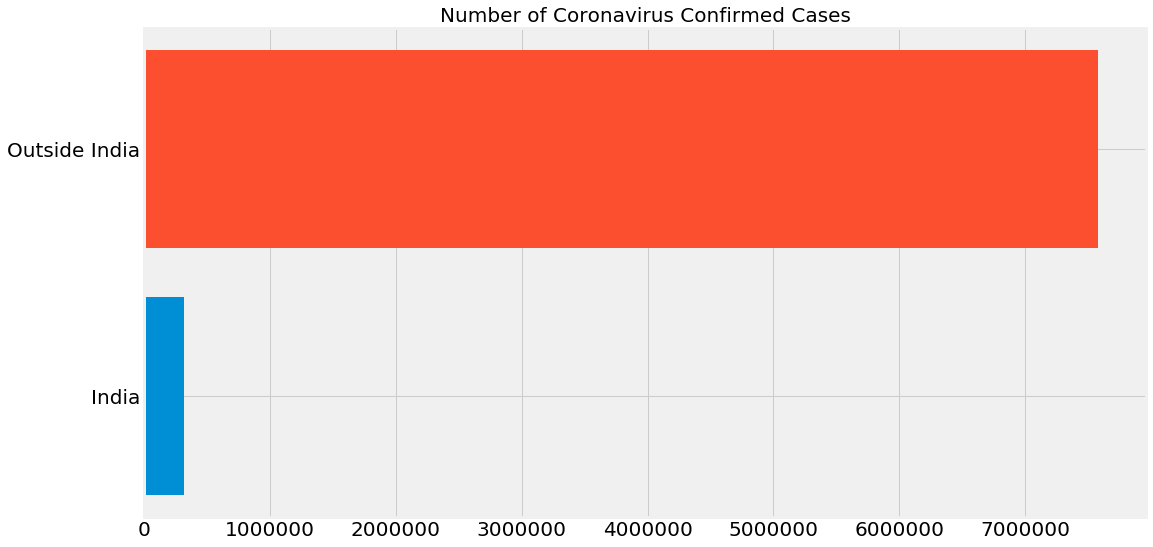

In [66]:
India_confirmed = latest_data[latest_data['Country_Region']=='India']['Confirmed'].sum()
outside_India_confirmed = np.sum(country_confirmed_cases) - India_confirmed
plt.figure(figsize=(16, 9))
plt.barh('India', India_confirmed)
plt.barh('Outside India', outside_India_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [68]:
print('Outside India: {} cases'.format(outside_India_confirmed))
print('India: {} cases'.format(India_confirmed))
print('Total: {} cases'.format(India_confirmed+outside_India_confirmed))

Outside India: 7580002 cases
India: 320922 cases
Total: 7900924 cases


In [69]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [70]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

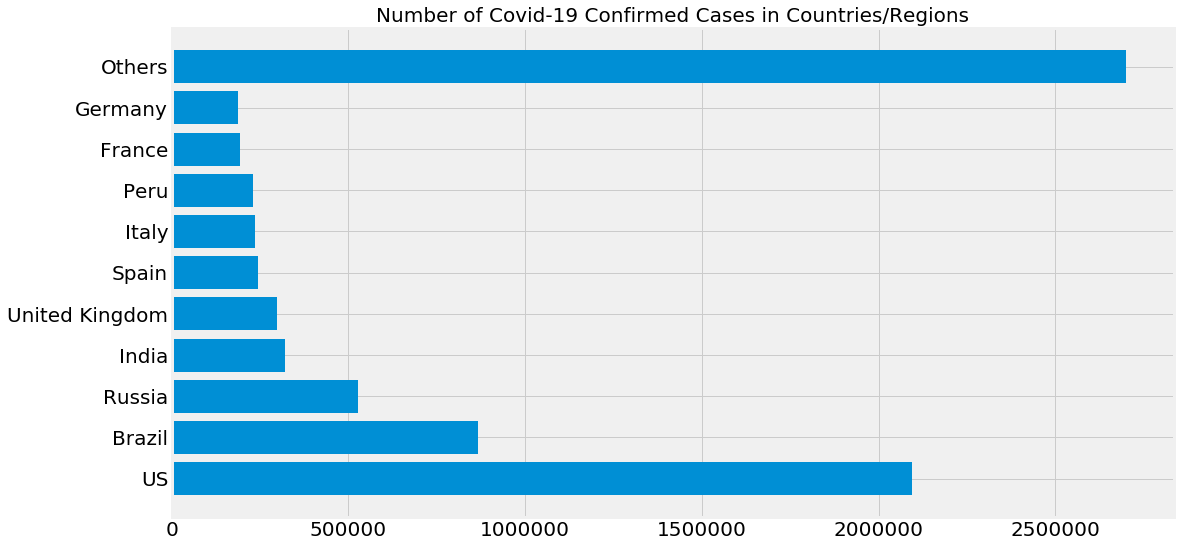

In [71]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries/Regions')

In [72]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

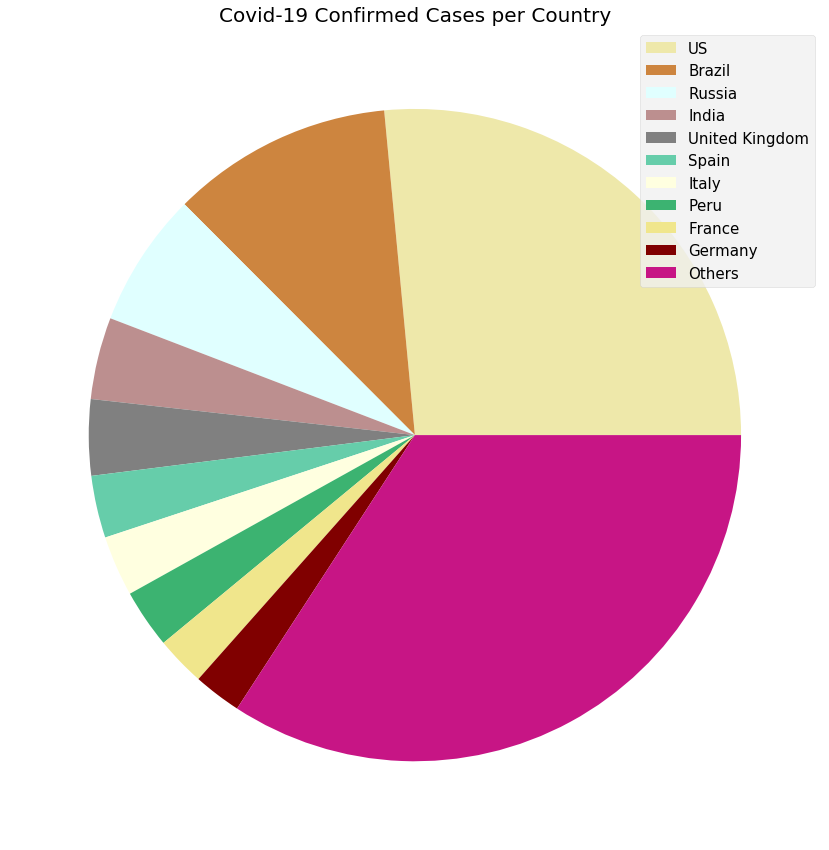

In [73]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [75]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the others category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

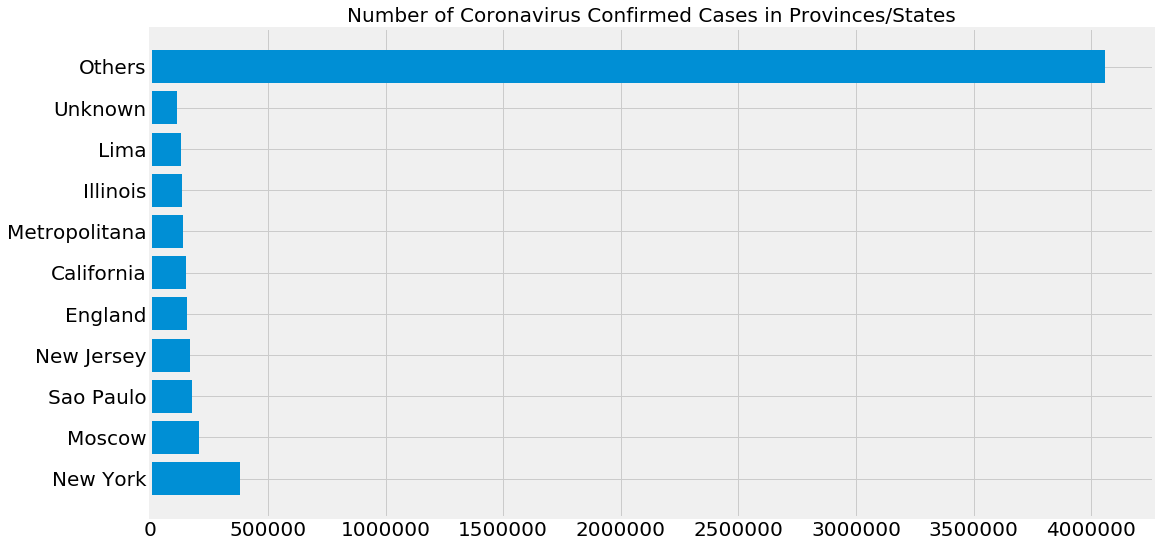

In [76]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Number of Coronavirus Confirmed Cases in Provinces/States')

In [77]:
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

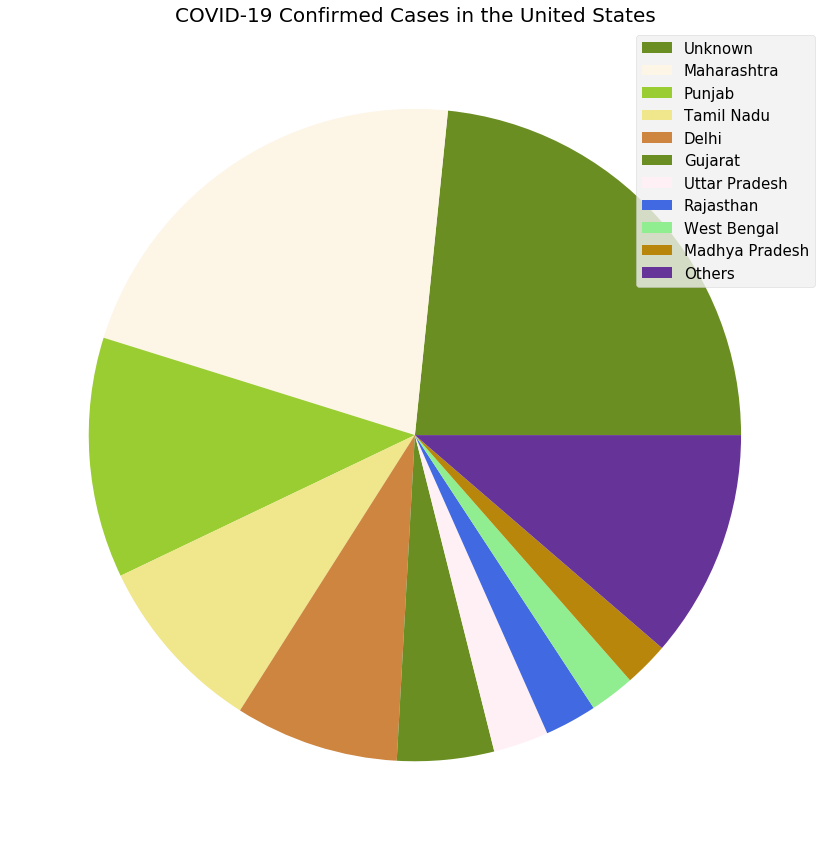

In [78]:
plot_pie_country_with_regions('India', 'COVID-19 Confirmed Cases in the United States')

In [121]:
days_since_3_12 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [122]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [123]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [124]:
start = '3/12/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [125]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_3_12, world_cases, test_size=0.25, shuffle=False) 

In [126]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [86]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 1387552.2067022058
MSE: 2441328690266.005


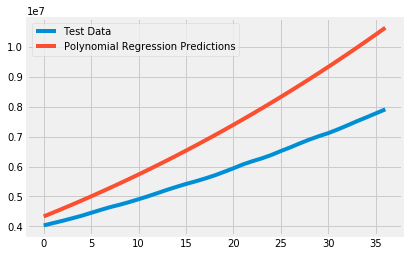

In [127]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [128]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 6314361.065669033
MSE: 54282379373192.66


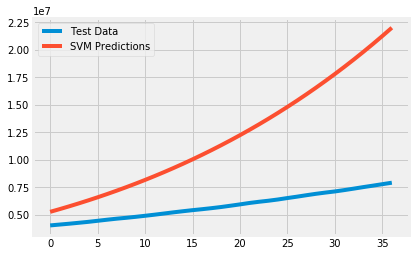

In [130]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

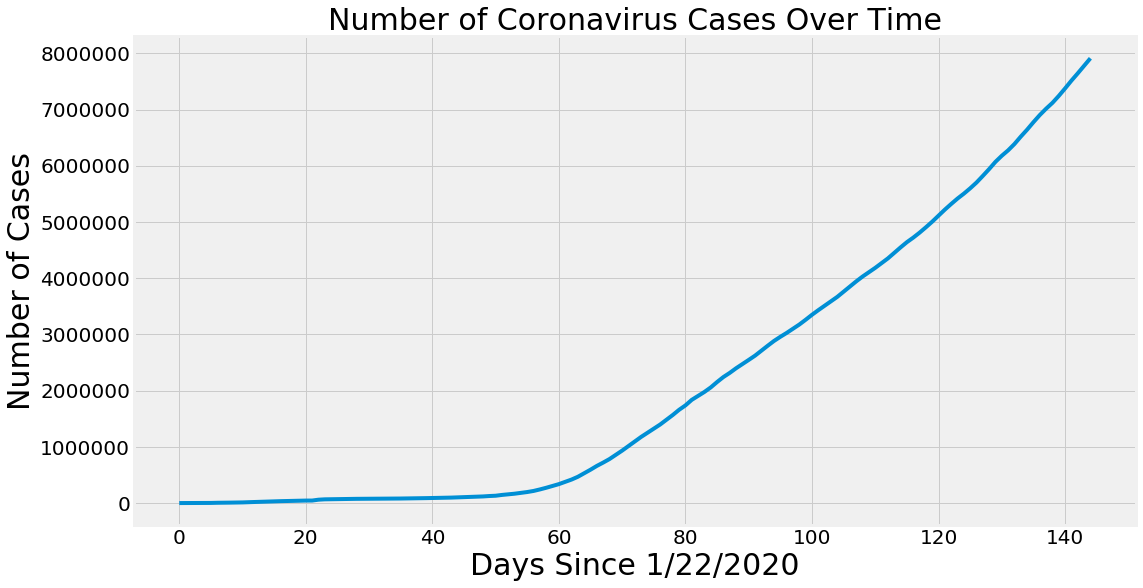

In [131]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

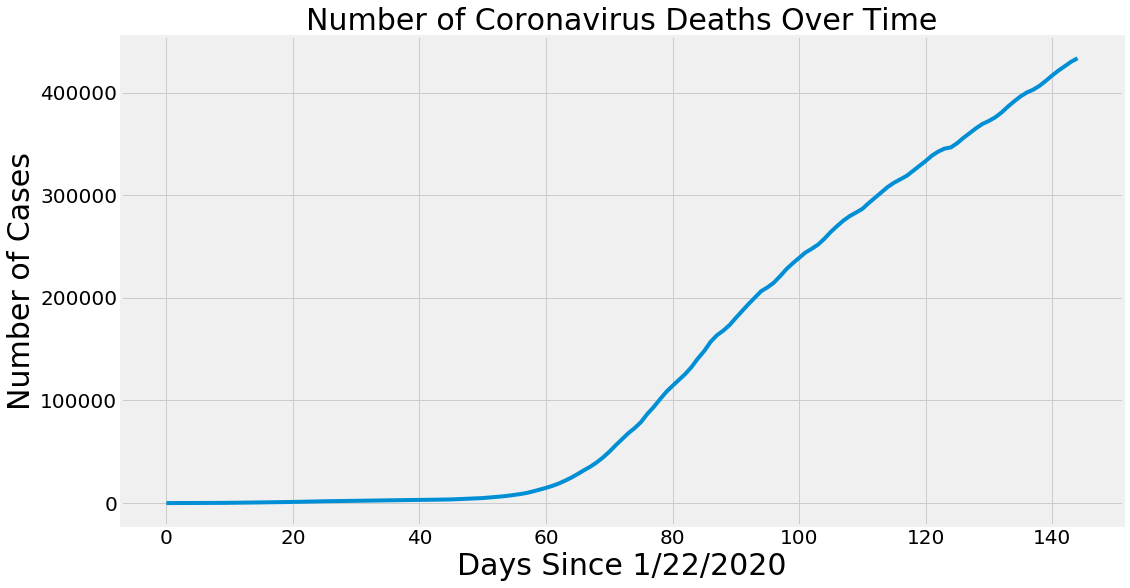

In [92]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

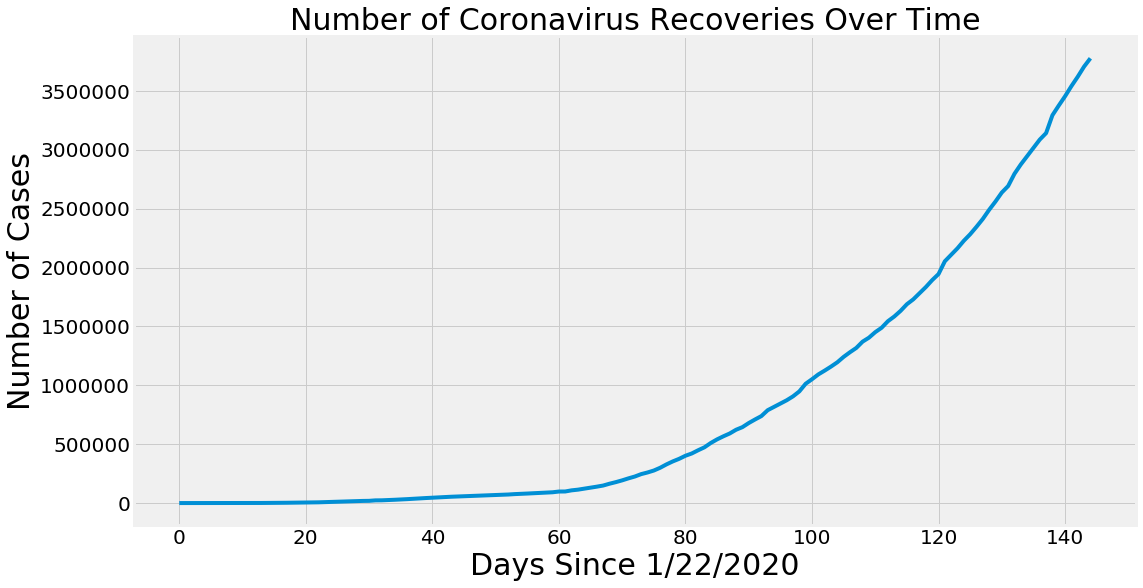

In [93]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

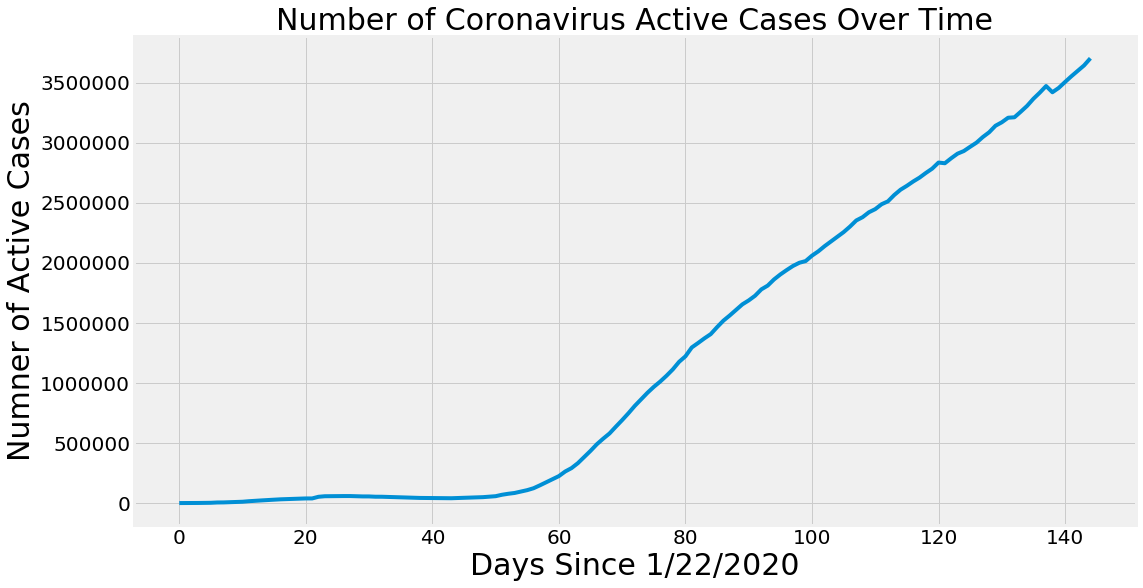

In [94]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Numner of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

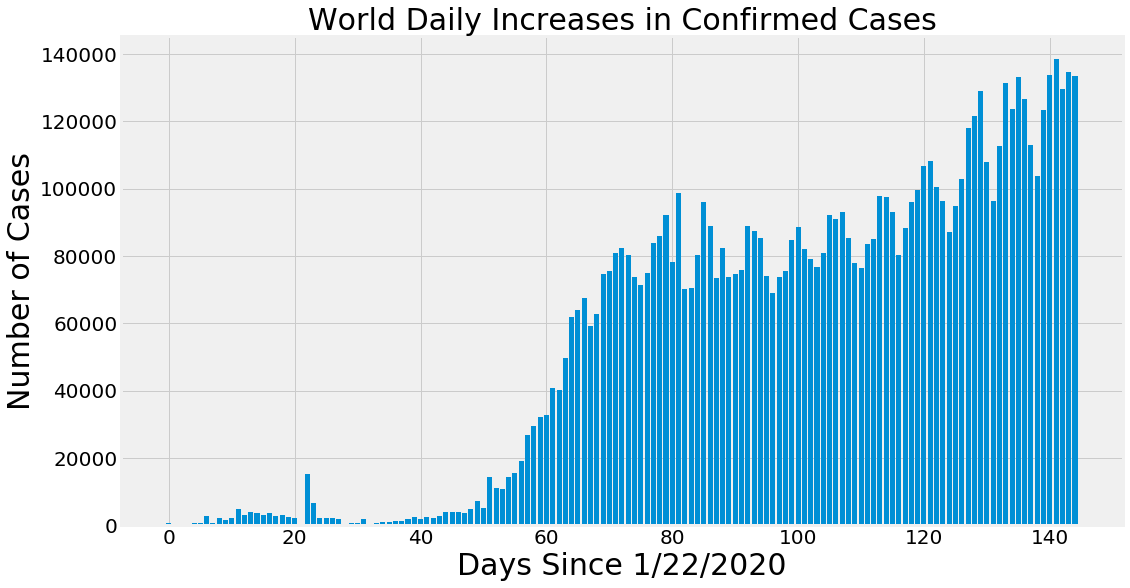

In [95]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

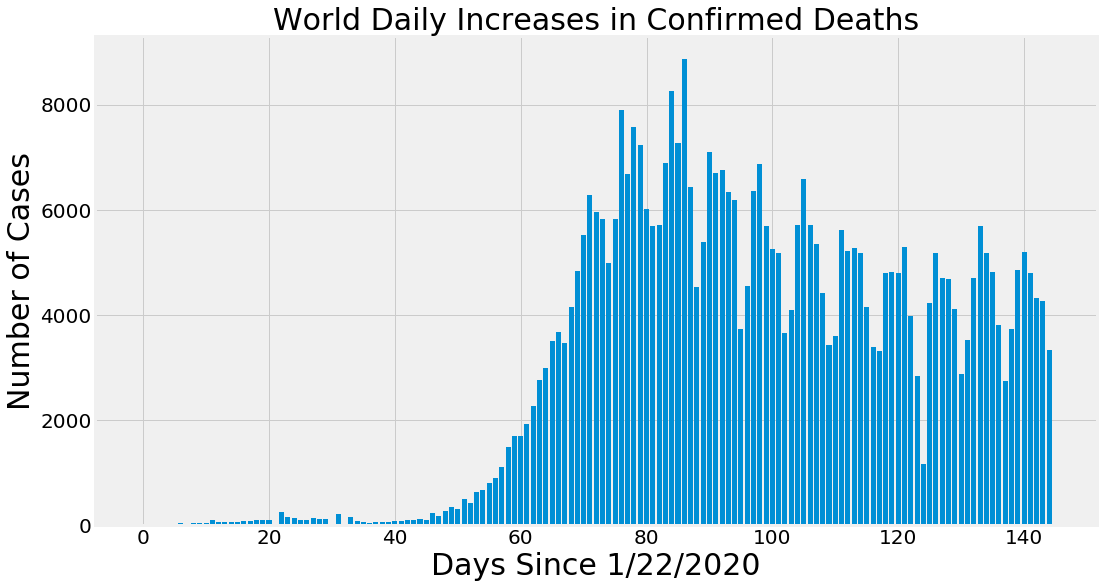

In [96]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

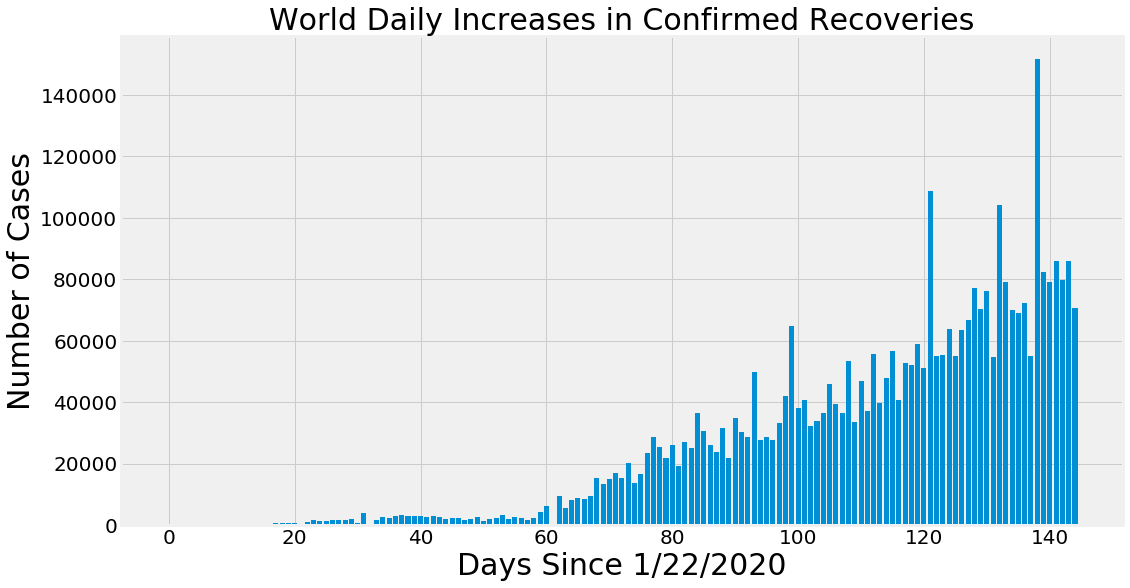

In [97]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [98]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

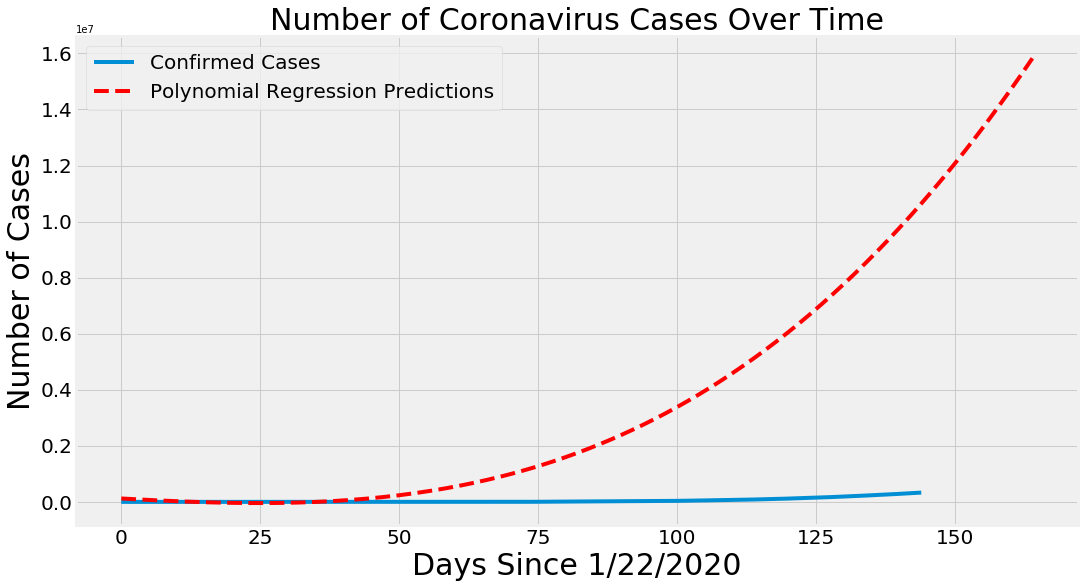

In [114]:
plot_predictions(adjusted_dates, india_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

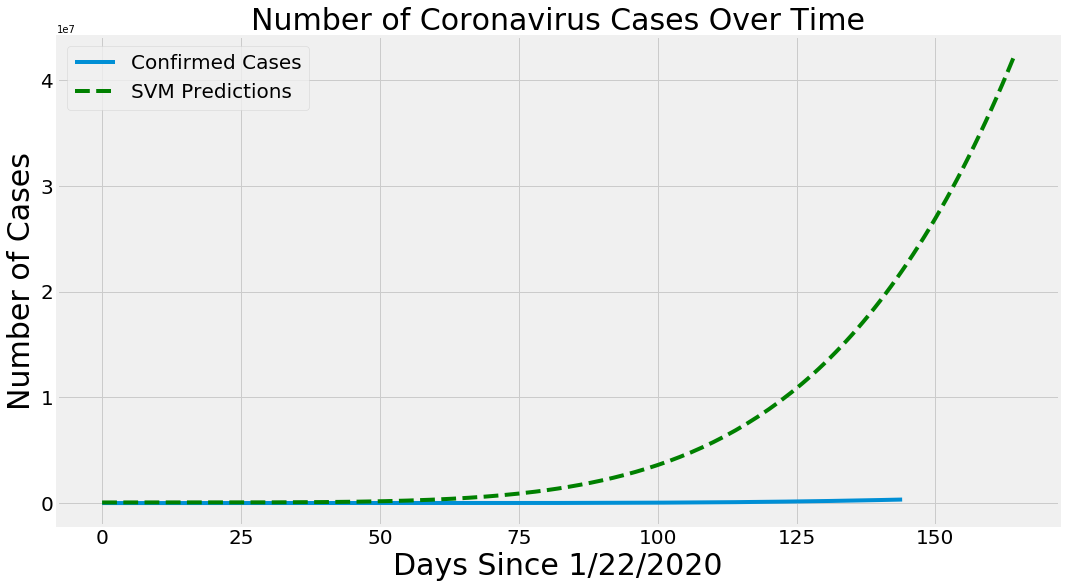

In [116]:
plot_predictions(adjusted_dates, india_cases, svm_pred, 'SVM Predictions', 'green')

In [118]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-20:])})
poly_df

,Date,Predicted number of Confirmed Cases Worldwide
0,06/15/2020,10871436.0
1,06/16/2020,11102935.0
2,06/17/2020,11337576.0
3,06/18/2020,11575377.0
4,06/19/2020,11816359.0
5,06/20/2020,12060543.0
6,06/21/2020,12307949.0
7,06/22/2020,12558596.0
8,06/23/2020,12812504.0
9,06/24/2020,13069694.0


In [102]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-20:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,06/15/2020,22773250.0
1,06/16/2020,23567417.0
2,06/17/2020,24383643.0
3,06/18/2020,25222383.0
4,06/19/2020,26084102.0
5,06/20/2020,26969267.0
6,06/21/2020,27878353.0
7,06/22/2020,28811843.0
8,06/23/2020,29770225.0
9,06/24/2020,30753992.0


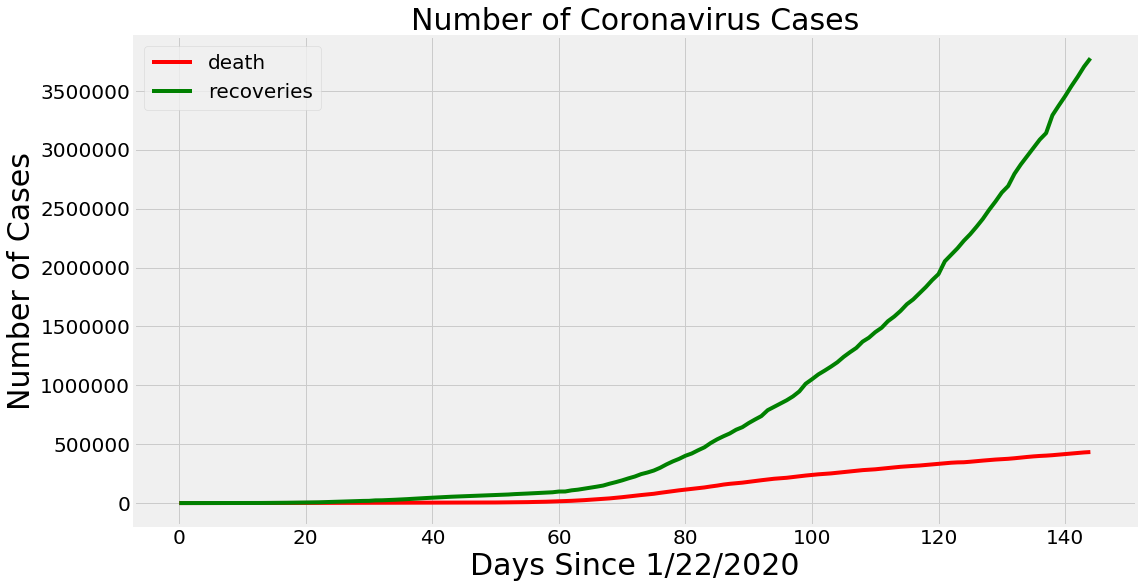

In [103]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

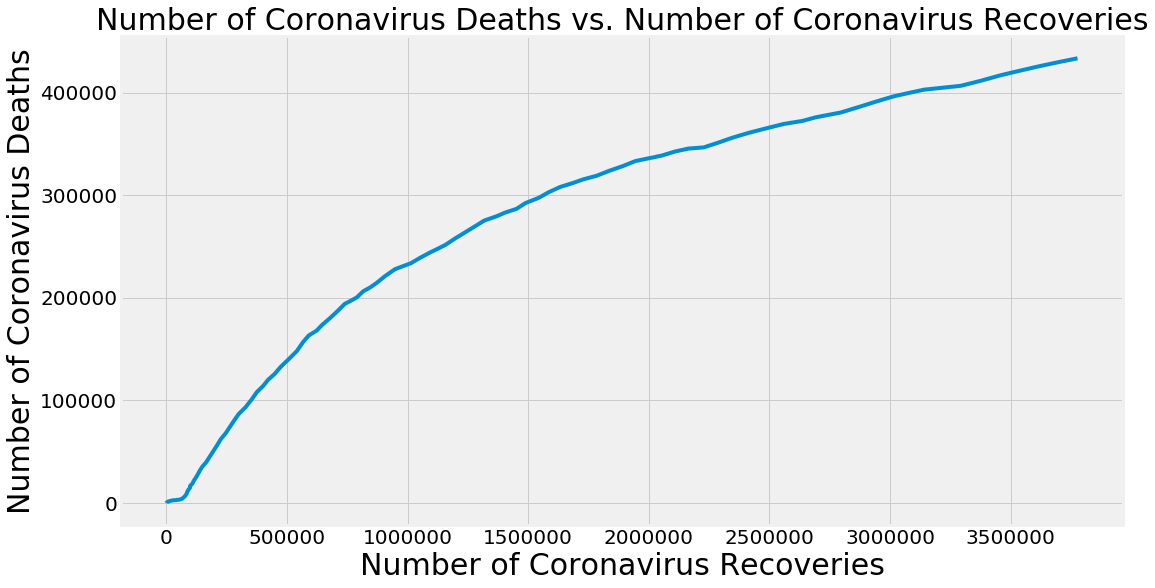

In [104]:
plt.figure(figsize=(16, 9))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [105]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

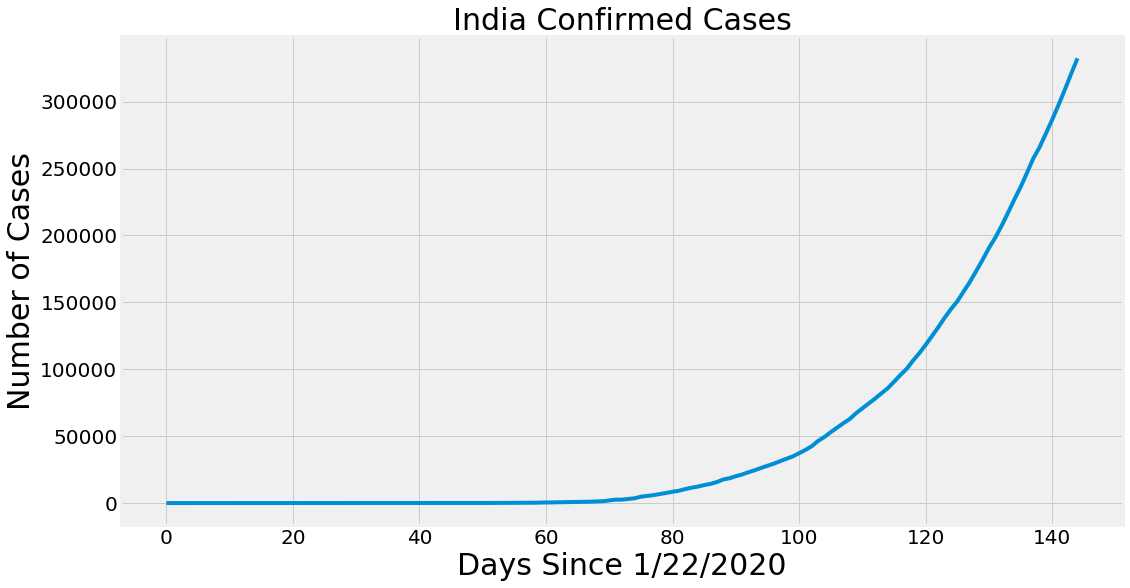

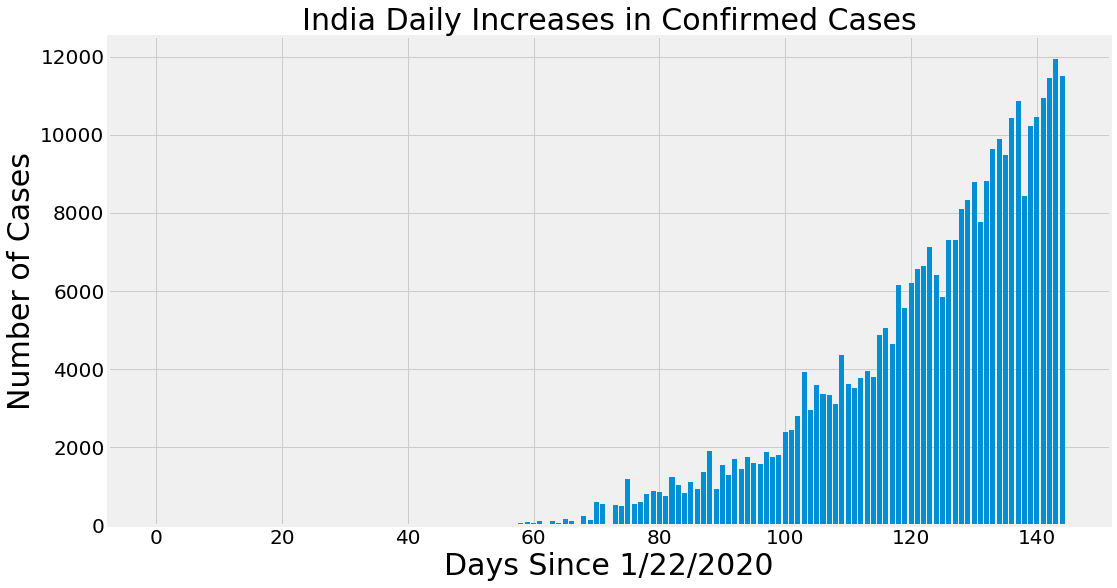

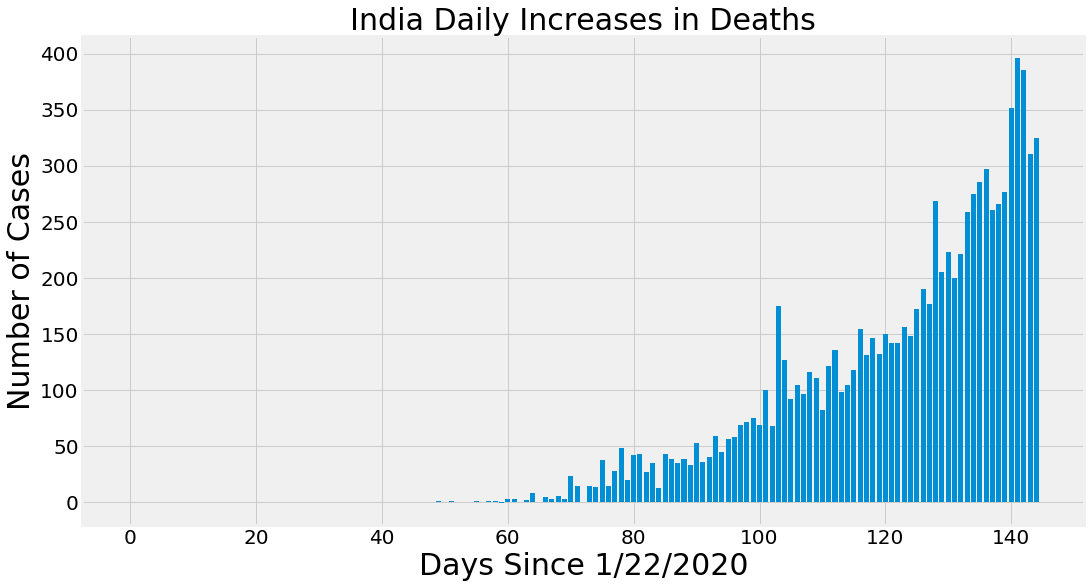

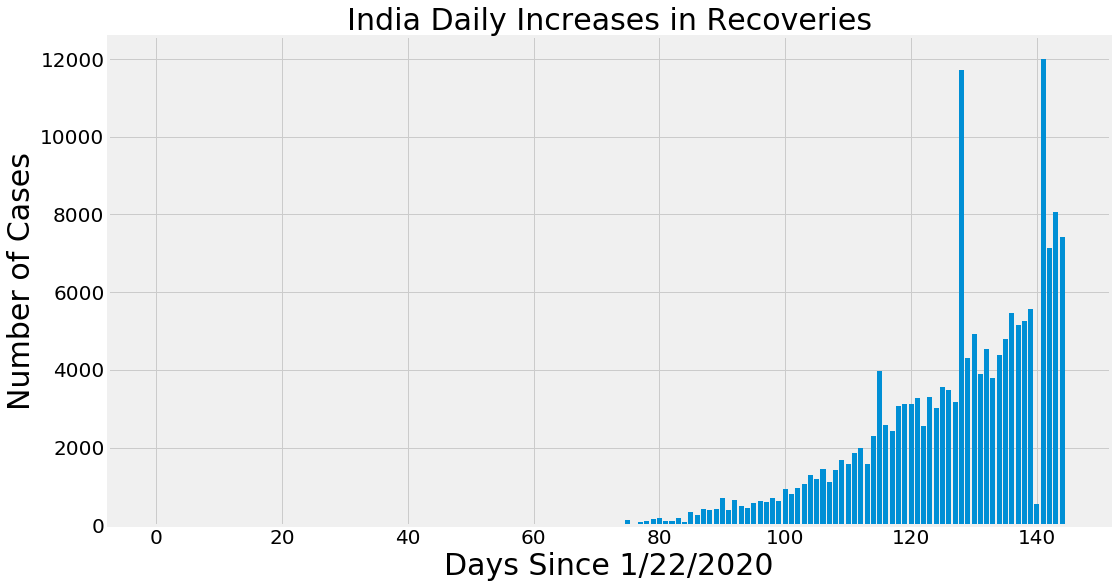

In [106]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

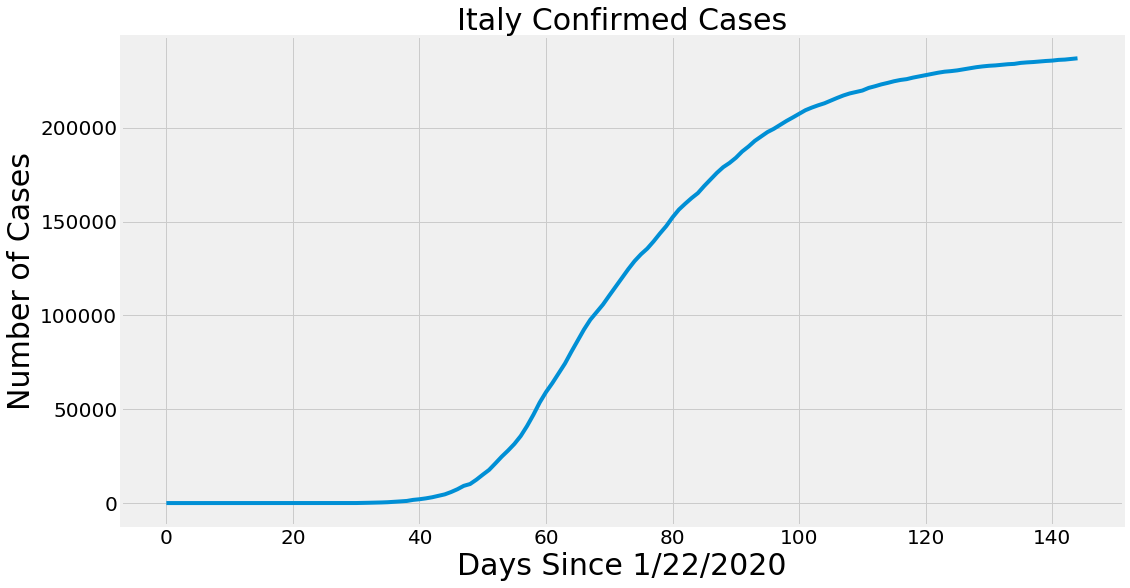

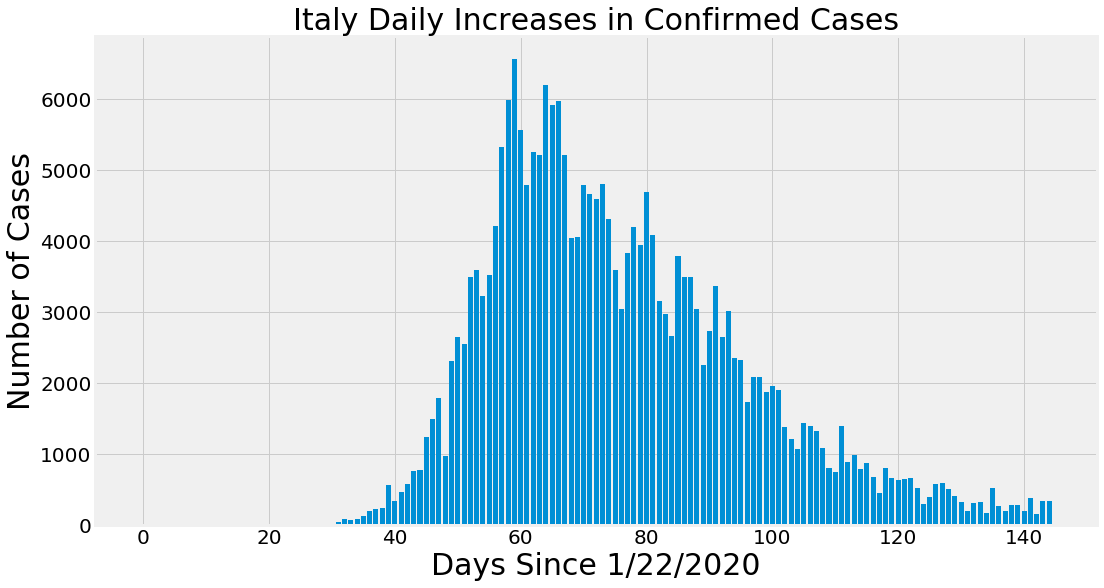

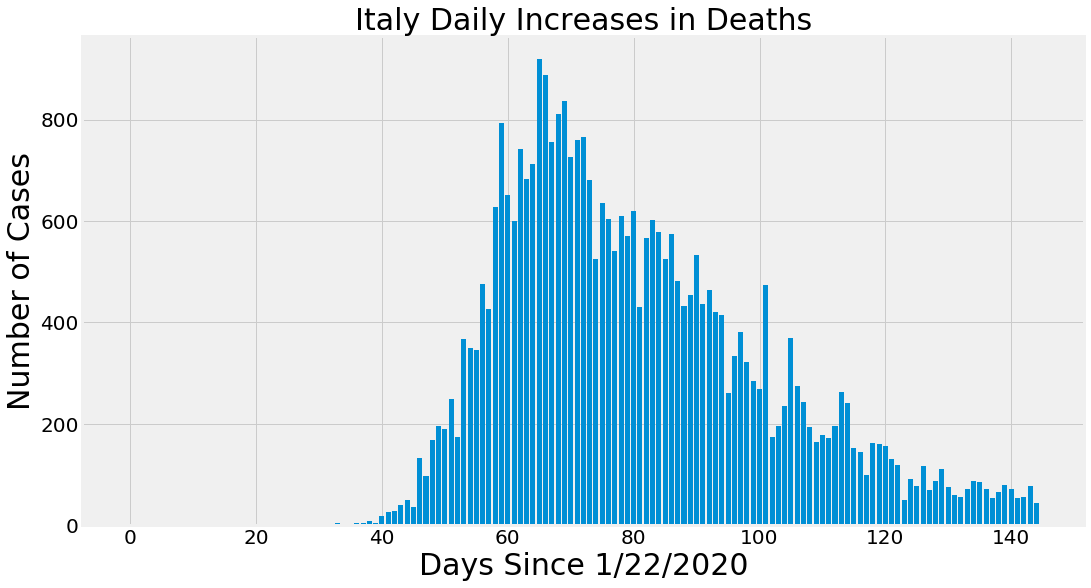

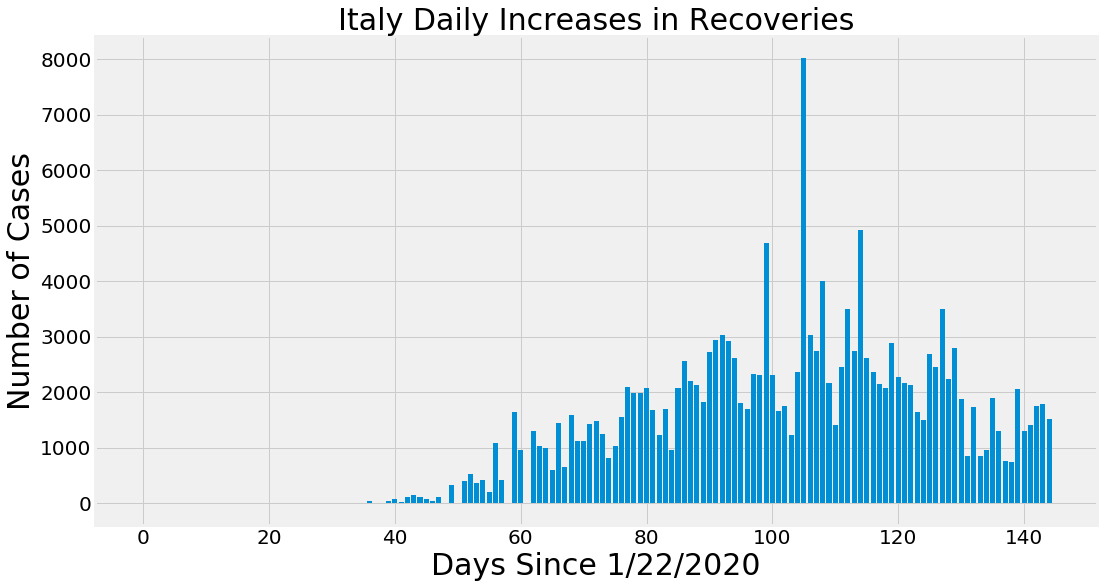

In [107]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

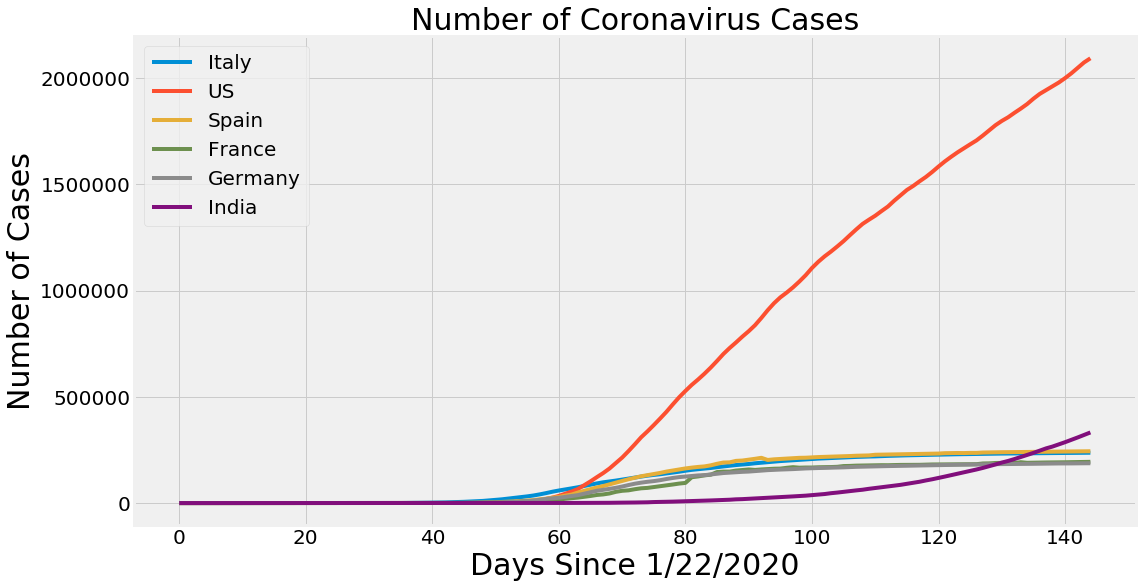

In [109]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend([ 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

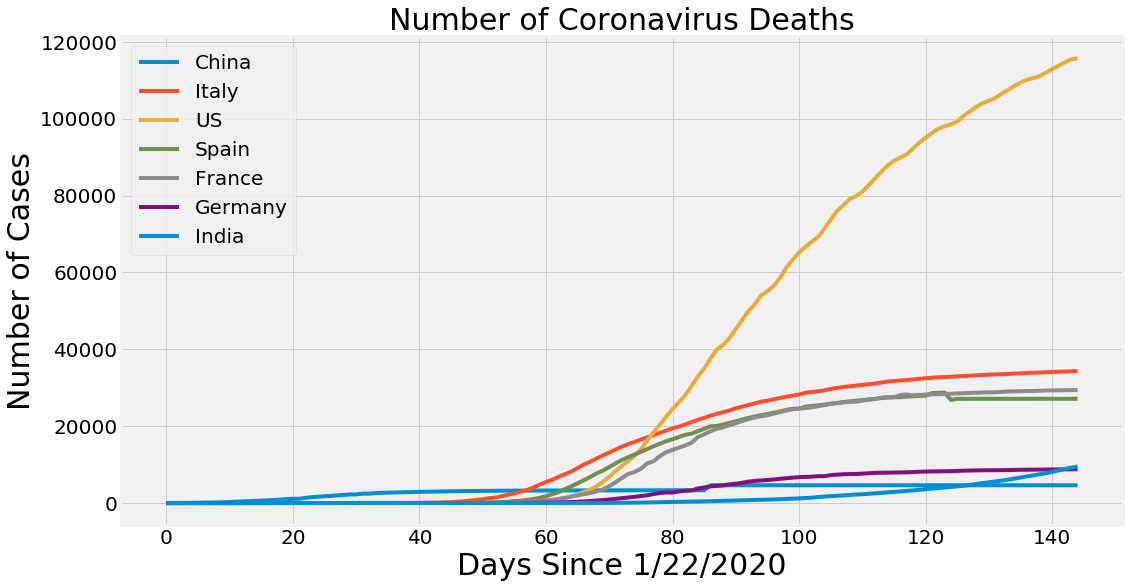

In [110]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.title('Number of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

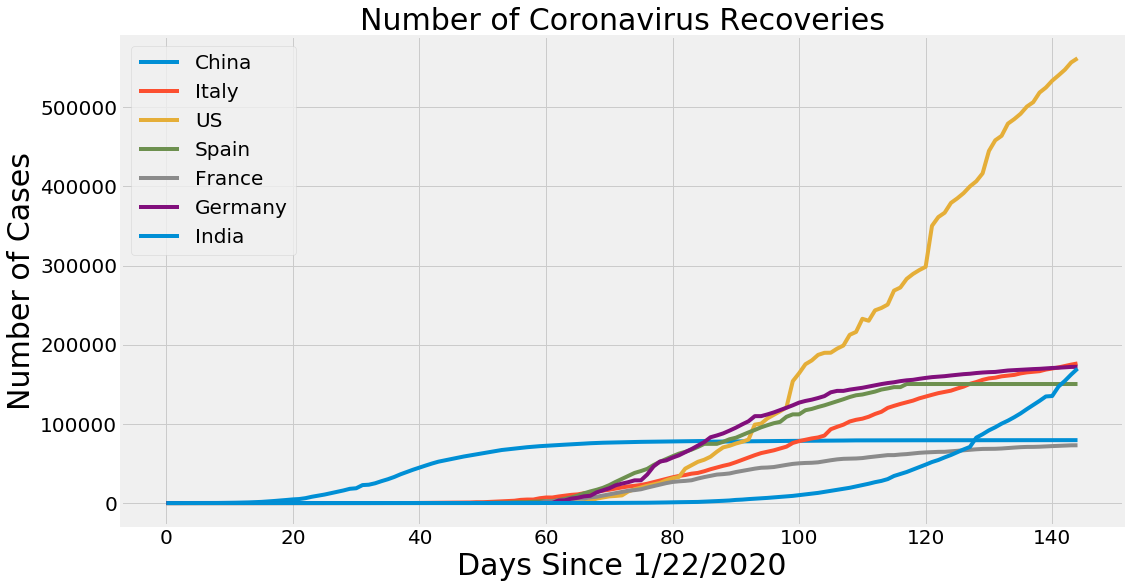

In [113]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.title('Number of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()